# Module 01: Python & Math Prerequisites

**Foundation for Deep Learning**

---

## Objectives

By the end of this notebook, you will:
- Master NumPy operations essential for deep learning
- Understand key calculus concepts (derivatives, chain rule)
- Know linear algebra fundamentals (vectors, matrices, operations)
- Grasp probability basics needed for ML

**Prerequisites:** Basic Python knowledge

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set display options
np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-whitegrid')

---

# Part 1: NumPy Essentials for Deep Learning

---

## 1.1 Why NumPy?

Deep learning is fundamentally about **matrix operations**. NumPy provides:
- Efficient array operations (vectorization)
- Broadcasting for element-wise operations
- Linear algebra routines

PyTorch tensors are designed to feel like NumPy arrays, so mastering NumPy translates directly.

## 1.2 Array Creation

In [4]:
# Creating arrays from Python lists
a = np.array([1, 2, 3, 4, 5])
print(f"1D array: {a}")
print(f"Shape: {a.shape}, Dtype: {a.dtype}")

1D array: [1 2 3 4 5]
Shape: (5,), Dtype: int64


In [5]:
# 2D array (matrix)
b = np.array([[1, 2, 3],
              [4, 5, 6]])
print(f"2D array:\n{b}")
print(f"Shape: {b.shape}  # (rows, columns)")

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)  # (rows, columns)


In [6]:
# Common initialization patterns
zeros = np.zeros((3, 4))      # 3x4 matrix of zeros
ones = np.ones((2, 3))        # 2x3 matrix of ones
identity = np.eye(3)          # 3x3 identity matrix
random_uniform = np.random.rand(2, 3)   # Uniform [0, 1)
random_normal = np.random.randn(2, 3)   # Standard normal

print("Zeros (3x4):")
print(zeros)
print("\nIdentity (3x3):")
print(identity)

Zeros (3x4):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Identity (3x3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Key Insight: Why Random Initialization Matters

In neural networks, we initialize weights randomly (not zeros). This breaks symmetry - if all weights were the same, all neurons would learn the same thing.

## 1.3 Indexing and Slicing

Understanding indexing is crucial for manipulating batches of data.

In [7]:
# Create a sample matrix
X = np.arange(12).reshape(3, 4)
print("Matrix X:")
print(X)

Matrix X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [8]:
# Indexing
print(f"Element at (0, 0): {X[0, 0]}")
print(f"Element at (1, 2): {X[1, 2]}")
print(f"First row: {X[0]}")
print(f"First column: {X[:, 0]}")
print(f"Last row: {X[-1]}")

Element at (0, 0): 0
Element at (1, 2): 6
First row: [0 1 2 3]
First column: [0 4 8]
Last row: [ 8  9 10 11]


In [9]:
# Slicing: [start:end:step]
print(f"First two rows:\n{X[:2]}")
print(f"\nColumns 1 to 3:\n{X[:, 1:3]}")
print(f"\nEvery other column:\n{X[:, ::2]}")

First two rows:
[[0 1 2 3]
 [4 5 6 7]]

Columns 1 to 3:
[[ 1  2]
 [ 5  6]
 [ 9 10]]

Every other column:
[[ 0  2]
 [ 4  6]
 [ 8 10]]


### Deep Learning Context

When working with batches:
- `X[0]` - First sample in the batch
- `X[:, 0]` - First feature across all samples
- `X[:32]` - First mini-batch of 32 samples

## 1.4 Reshaping Arrays

Neural networks often require specific input shapes. Reshaping is essential.

In [10]:
# Original array
a = np.arange(12)
print(f"Original: {a}, shape: {a.shape}")

# Reshape to 2D
b = a.reshape(3, 4)
print(f"\nReshaped to (3, 4):\n{b}")

# Using -1 for automatic dimension
c = a.reshape(2, -1)  # -1 means "figure it out"
print(f"\nReshaped to (2, -1) -> {c.shape}:\n{c}")

Original: [ 0  1  2  3  4  5  6  7  8  9 10 11], shape: (12,)

Reshaped to (3, 4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Reshaped to (2, -1) -> (2, 6):
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [11]:
# Flatten - convert to 1D
flattened = b.flatten()
print(f"Flattened: {flattened}")

# Transpose
print(f"\nOriginal (3, 4):\n{b}")
print(f"\nTransposed (4, 3):\n{b.T}")

Flattened: [ 0  1  2  3  4  5  6  7  8  9 10 11]

Original (3, 4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Transposed (4, 3):
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


### Deep Learning Context

Common reshaping patterns:
- **Flattening images**: 28x28 image -> 784-element vector for dense layers
- **Adding batch dimension**: (features,) -> (1, features)
- **Transposing**: Switching between row vectors and column vectors

## 1.5 Broadcasting

Broadcasting allows NumPy to perform operations on arrays of different shapes. This is **critical** for understanding how neural network operations work efficiently.

In [12]:
# Scalar broadcasting
a = np.array([1, 2, 3])
print(f"a = {a}")
print(f"a + 10 = {a + 10}")  # 10 is broadcast to [10, 10, 10]

a = [1 2 3]
a + 10 = [11 12 13]


In [13]:
# Vector + Matrix broadcasting
X = np.array([[1, 2, 3],
              [4, 5, 6]])
bias = np.array([10, 20, 30])

print("X (2x3):")
print(X)
print(f"\nbias (3,): {bias}")
print("\nX + bias (bias broadcast to each row):")
print(X + bias)

X (2x3):
[[1 2 3]
 [4 5 6]]

bias (3,): [10 20 30]

X + bias (bias broadcast to each row):
[[11 22 33]
 [14 25 36]]


### Broadcasting Rules

1. If arrays have different number of dimensions, pad the smaller one with 1s on the left
2. Arrays are compatible if dimensions are equal OR one of them is 1
3. The result shape is the maximum along each dimension

**Example:** (2, 3) + (3,) -> (2, 3) + (1, 3) -> (2, 3)

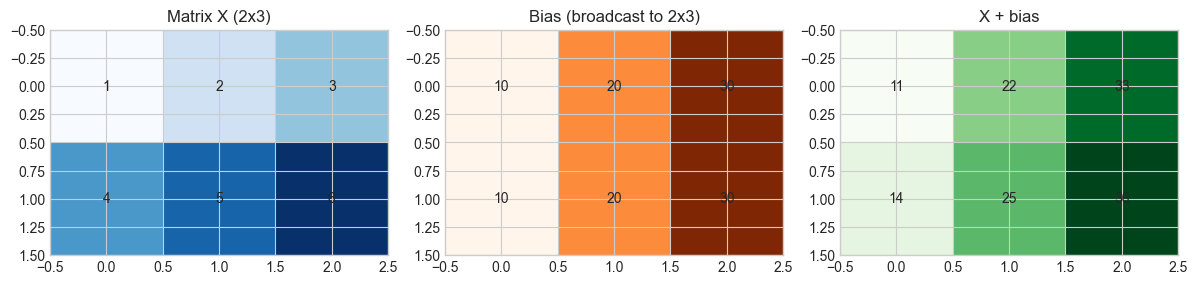

In [14]:
# Visualization of broadcasting
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Matrix
axes[0].imshow(X, cmap='Blues')
axes[0].set_title('Matrix X (2x3)')
for i in range(2):
    for j in range(3):
        axes[0].text(j, i, X[i, j], ha='center', va='center')

# Bias (broadcast)
bias_broadcast = np.tile(bias, (2, 1))
axes[1].imshow(bias_broadcast, cmap='Oranges')
axes[1].set_title('Bias (broadcast to 2x3)')
for i in range(2):
    for j in range(3):
        axes[1].text(j, i, bias_broadcast[i, j], ha='center', va='center')

# Result
result = X + bias
axes[2].imshow(result, cmap='Greens')
axes[2].set_title('X + bias')
for i in range(2):
    for j in range(3):
        axes[2].text(j, i, result[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()

### Deep Learning Context

Broadcasting is used in:
- **Adding bias**: Output = W @ X + b (b is broadcast)
- **Normalization**: (X - mean) / std
- **Scaling**: X * scale_factor

## 1.6 Vectorization

**Vectorization** means using array operations instead of loops. This is crucial for performance.

In [15]:
import time

# Create large arrays
n = 1000000
a = np.random.randn(n)
b = np.random.randn(n)

# Loop approach (slow)
start = time.time()
c_loop = np.zeros(n)
for i in range(n):
    c_loop[i] = a[i] * b[i]
loop_time = time.time() - start

# Vectorized approach (fast)
start = time.time()
c_vec = a * b
vec_time = time.time() - start

print(f"Loop time: {loop_time:.4f} seconds")
print(f"Vectorized time: {vec_time:.6f} seconds")
print(f"Speedup: {loop_time/vec_time:.0f}x faster!")

Loop time: 1.0498 seconds
Vectorized time: 0.002074 seconds
Speedup: 506x faster!


### Rule of Thumb

**Never use explicit Python loops for array operations.** Always look for a NumPy function or use vectorized operations.

---

# Part 2: Linear Algebra Fundamentals

---

## 2.1 Vectors

A **vector** is an ordered list of numbers. In deep learning:
- Input features are vectors
- Weights are vectors (or matrices)
- Gradients are vectors

In [16]:
# Vectors in NumPy
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])

print(f"v = {v}")
print(f"w = {w}")

# Vector operations
print(f"\nv + w = {v + w}")      # Element-wise addition
print(f"v * w = {v * w}")        # Element-wise multiplication
print(f"2 * v = {2 * v}")        # Scalar multiplication

v = [1 2 3]
w = [4 5 6]

v + w = [5 7 9]
v * w = [ 4 10 18]
2 * v = [2 4 6]


## 2.2 Dot Product

The **dot product** is the fundamental operation in neural networks. It computes a weighted sum.

$$\mathbf{u} \cdot \mathbf{v} = \sum_{i=1}^{n} u_i v_i = u_1 v_1 + u_2 v_2 + ... + u_n v_n$$

In [17]:
# Dot product
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])

# Manual calculation
manual = 1*4 + 2*5 + 3*6
print(f"Manual: 1*4 + 2*5 + 3*6 = {manual}")

# NumPy
print(f"np.dot(v, w) = {np.dot(v, w)}")
print(f"v @ w = {v @ w}")  # @ operator

Manual: 1*4 + 2*5 + 3*6 = 32
np.dot(v, w) = 32
v @ w = 32


### Deep Learning Context: The Neuron

A single neuron computes:
$$z = \mathbf{w} \cdot \mathbf{x} + b = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$$

This is a dot product of weights and inputs, plus a bias!

In [18]:
# Simulating a single neuron
inputs = np.array([0.5, 0.3, 0.2])     # 3 input features
weights = np.array([0.4, 0.6, -0.2])   # 3 weights
bias = 0.1

# Weighted sum
z = np.dot(weights, inputs) + bias
print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Weighted sum z = w.x + b = {z:.4f}")

Inputs: [0.5 0.3 0.2]
Weights: [ 0.4  0.6 -0.2]
Bias: 0.1
Weighted sum z = w.x + b = 0.4400


## 2.3 Matrices

A **matrix** is a 2D array of numbers. In neural networks, we use matrices to:
- Represent weights between layers
- Process batches of data

In [19]:
# Creating matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]])

print(f"Matrix A (2x3):")
print(A)
print(f"\nShape: {A.shape}")
print(f"Number of rows: {A.shape[0]}")
print(f"Number of columns: {A.shape[1]}")

Matrix A (2x3):
[[1 2 3]
 [4 5 6]]

Shape: (2, 3)
Number of rows: 2
Number of columns: 3


## 2.4 Matrix Multiplication

Matrix multiplication is the core operation in neural networks.

For matrices A (m x n) and B (n x p), the result C = AB has shape (m x p).

$$C_{ij} = \sum_{k=1}^{n} A_{ik} B_{kj}$$

**Key Rule:** Inner dimensions must match: (m x **n**) @ (**n** x p) = (m x p)

In [20]:
# Matrix multiplication
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])   # 3x2

B = np.array([[7, 8, 9],
              [10, 11, 12]])  # 2x3

C = A @ B  # or np.matmul(A, B)

print(f"A (3x2):\n{A}")
print(f"\nB (2x3):\n{B}")
print(f"\nC = A @ B (3x3):\n{C}")

A (3x2):
[[1 2]
 [3 4]
 [5 6]]

B (2x3):
[[ 7  8  9]
 [10 11 12]]

C = A @ B (3x3):
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]


In [21]:
# Verify one element manually
# C[0, 0] = A[0, :] . B[:, 0] = 1*7 + 2*10 = 27
print(f"C[0,0] = A[0,:] @ B[:,0] = {A[0,:]} @ {B[:,0]} = {A[0,:] @ B[:,0]}")

C[0,0] = A[0,:] @ B[:,0] = [1 2] @ [ 7 10] = 27


### Deep Learning Context: Layer as Matrix Multiplication

A neural network layer transforms input X using weights W:
$$\mathbf{Z} = \mathbf{X} \mathbf{W}^T + \mathbf{b}$$

Where:
- X is (batch_size, input_features)
- W is (output_features, input_features)
- b is (output_features,)
- Z is (batch_size, output_features)

In [22]:
# Simulating a layer
batch_size = 4
input_features = 3
output_features = 2

# Input batch
X = np.random.randn(batch_size, input_features)
print(f"Input X shape: {X.shape}")

# Weights and bias
W = np.random.randn(output_features, input_features)
b = np.random.randn(output_features)
print(f"Weights W shape: {W.shape}")
print(f"Bias b shape: {b.shape}")

# Forward pass
Z = X @ W.T + b  # b is broadcast!
print(f"\nOutput Z shape: {Z.shape}")
print(f"Output Z:\n{Z}")

Input X shape: (4, 3)
Weights W shape: (2, 3)
Bias b shape: (2,)

Output Z shape: (4, 2)
Output Z:
[[ 1.5784 -2.175 ]
 [ 1.7733 -2.1282]
 [-0.6307 -0.1737]
 [-0.2911  0.1736]]


## 2.5 Vector Norms

Norms measure the "size" or "length" of a vector.

**L2 Norm (Euclidean):** $||\mathbf{x}||_2 = \sqrt{\sum_i x_i^2}$

**L1 Norm (Manhattan):** $||\mathbf{x}||_1 = \sum_i |x_i|$

In [23]:
x = np.array([3, 4])

# L2 norm
l2_manual = np.sqrt(3**2 + 4**2)
l2_numpy = np.linalg.norm(x)
print(f"L2 norm: sqrt(3^2 + 4^2) = {l2_manual} = {l2_numpy}")

# L1 norm
l1_manual = abs(3) + abs(4)
l1_numpy = np.linalg.norm(x, ord=1)
print(f"L1 norm: |3| + |4| = {l1_manual} = {l1_numpy}")

L2 norm: sqrt(3^2 + 4^2) = 5.0 = 5.0
L1 norm: |3| + |4| = 7 = 7.0


### Deep Learning Context

Norms are used in:
- **Regularization**: L1 (Lasso) and L2 (Ridge) penalties on weights
- **Gradient clipping**: Limit gradient magnitude
- **Normalization**: Dividing by norm to get unit vectors

---

# Part 3: Essential Calculus

---

## 3.1 Derivatives

A **derivative** measures how a function changes as its input changes. It's the slope of the tangent line.

$$f'(x) = \frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

In [24]:
# Numerical derivative approximation
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Example: f(x) = x^2, derivative = 2x
f = lambda x: x**2

x = 3
numerical = numerical_derivative(f, x)
analytical = 2 * x

print(f"f(x) = x^2 at x = {x}")
print(f"Numerical derivative: {numerical:.6f}")
print(f"Analytical derivative (2x): {analytical}")

f(x) = x^2 at x = 3
Numerical derivative: 6.000000
Analytical derivative (2x): 6


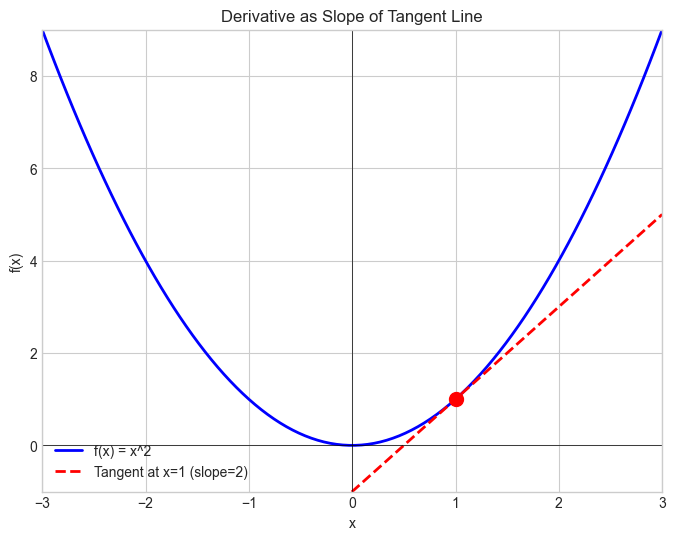

In [25]:
# Visualize derivative as slope
x_range = np.linspace(-3, 3, 100)
y = x_range ** 2

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_range, y, 'b-', linewidth=2, label='f(x) = x^2')

# Tangent line at x = 1
x0 = 1
slope = 2 * x0  # derivative at x0
y0 = x0 ** 2
tangent = slope * (x_range - x0) + y0

ax.plot(x_range, tangent, 'r--', linewidth=2, label=f'Tangent at x={x0} (slope={slope})')
ax.scatter([x0], [y0], color='red', s=100, zorder=5)

ax.set_xlim(-3, 3)
ax.set_ylim(-1, 9)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Derivative as Slope of Tangent Line')
ax.legend()
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
plt.show()

## 3.2 Common Derivatives

| Function | Derivative |
|----------|------------|
| $f(x) = c$ (constant) | $f'(x) = 0$ |
| $f(x) = x^n$ | $f'(x) = nx^{n-1}$ |
| $f(x) = e^x$ | $f'(x) = e^x$ |
| $f(x) = \ln(x)$ | $f'(x) = 1/x$ |
| $f(x) = \sigma(x) = \frac{1}{1+e^{-x}}$ | $f'(x) = \sigma(x)(1-\sigma(x))$ |

## 3.3 The Chain Rule

The **chain rule** is the foundation of backpropagation. It tells us how to differentiate composite functions.

If $y = f(g(x))$, then:
$$\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx} = f'(g(x)) \cdot g'(x)$$

**Intuition:** Multiply the derivatives along the path.

In [26]:
# Example: y = (2x + 1)^3
# Let g(x) = 2x + 1, f(g) = g^3
# dy/dx = df/dg * dg/dx = 3g^2 * 2 = 6(2x+1)^2

def composite(x):
    return (2*x + 1)**3

def analytical_derivative(x):
    return 6 * (2*x + 1)**2

x = 2
numerical = numerical_derivative(composite, x)
analytical = analytical_derivative(x)

print(f"y = (2x + 1)^3 at x = {x}")
print(f"Numerical: {numerical:.4f}")
print(f"Analytical (chain rule): {analytical}")

y = (2x + 1)^3 at x = 2
Numerical: 150.0000
Analytical (chain rule): 150


### Deep Learning Context

In a neural network:
$$\text{Loss} = L(\sigma(wx + b))$$

To find $\frac{\partial L}{\partial w}$, we apply the chain rule:
$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial z} \cdot \frac{\partial z}{\partial w}$$

This is **backpropagation** - multiplying gradients backwards through the network.

## 3.4 Partial Derivatives

When a function has multiple variables, a **partial derivative** measures change with respect to one variable while holding others constant.

$$f(x, y) = x^2 + xy + y^2$$
$$\frac{\partial f}{\partial x} = 2x + y$$
$$\frac{\partial f}{\partial y} = x + 2y$$

In [27]:
# Numerical partial derivatives
def f(x, y):
    return x**2 + x*y + y**2

def partial_x(x, y, h=1e-5):
    return (f(x+h, y) - f(x-h, y)) / (2*h)

def partial_y(x, y, h=1e-5):
    return (f(x, y+h) - f(x, y-h)) / (2*h)

x, y = 2, 3

print(f"f(x, y) = x^2 + xy + y^2 at ({x}, {y})")
print(f"df/dx numerical: {partial_x(x, y):.4f}, analytical (2x+y): {2*x + y}")
print(f"df/dy numerical: {partial_y(x, y):.4f}, analytical (x+2y): {x + 2*y}")

f(x, y) = x^2 + xy + y^2 at (2, 3)
df/dx numerical: 7.0000, analytical (2x+y): 7
df/dy numerical: 8.0000, analytical (x+2y): 8


## 3.5 The Gradient

The **gradient** is a vector of all partial derivatives. It points in the direction of steepest ascent.

$$\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n} \right]$$

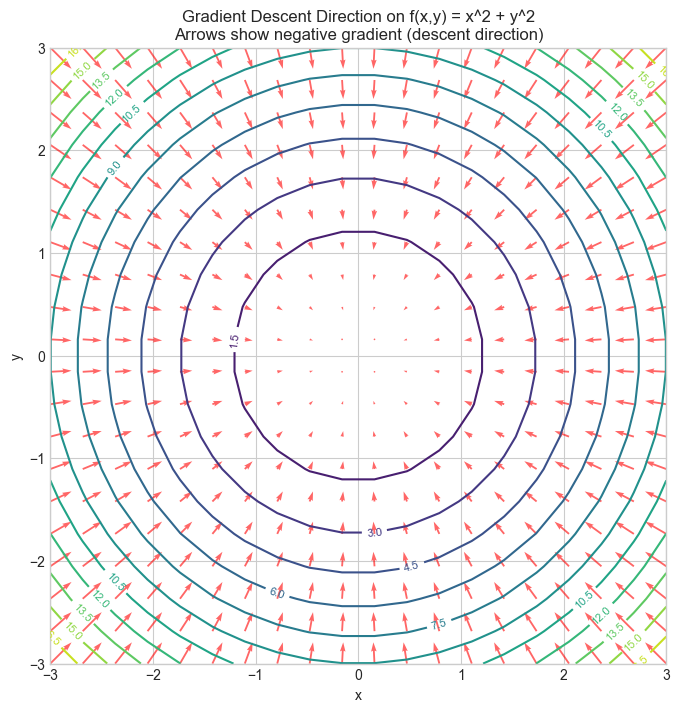

In [28]:
# Visualize gradient on a 2D function
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2  # Simple bowl function

# Gradients: df/dx = 2x, df/dy = 2y
U = 2 * X
V = 2 * Y

fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contour(X, Y, Z, levels=15, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)
ax.quiver(X, Y, -U, -V, color='red', alpha=0.6)  # Negative gradient (descent)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Direction on f(x,y) = x^2 + y^2\nArrows show negative gradient (descent direction)')
ax.set_aspect('equal')
plt.show()

### Deep Learning Context

In gradient descent, we update parameters in the **opposite** direction of the gradient:
$$\theta_{new} = \theta_{old} - \alpha \nabla L(\theta)$$

Where:
- $\theta$ are the model parameters
- $\alpha$ is the learning rate
- $\nabla L$ is the gradient of the loss

---

# Part 4: Probability Basics

---

## 4.1 Probability Distributions

A **probability distribution** describes how likely different outcomes are.

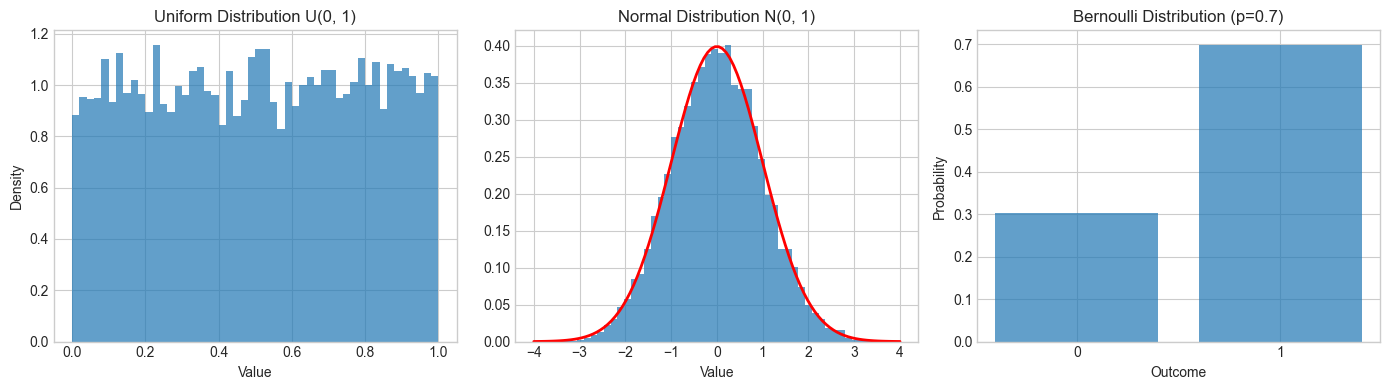

In [29]:
# Common distributions
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Uniform distribution
uniform_samples = np.random.uniform(0, 1, 10000)
axes[0].hist(uniform_samples, bins=50, density=True, alpha=0.7)
axes[0].set_title('Uniform Distribution U(0, 1)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

# Normal (Gaussian) distribution
normal_samples = np.random.normal(0, 1, 10000)
axes[1].hist(normal_samples, bins=50, density=True, alpha=0.7)
x = np.linspace(-4, 4, 100)
axes[1].plot(x, 1/np.sqrt(2*np.pi) * np.exp(-x**2/2), 'r-', linewidth=2)
axes[1].set_title('Normal Distribution N(0, 1)')
axes[1].set_xlabel('Value')

# Bernoulli (binary) outcomes
p = 0.7
bernoulli_samples = np.random.binomial(1, p, 10000)
axes[2].bar([0, 1], [np.mean(bernoulli_samples==0), np.mean(bernoulli_samples==1)], 
            alpha=0.7, tick_label=['0', '1'])
axes[2].set_title(f'Bernoulli Distribution (p={p})')
axes[2].set_xlabel('Outcome')
axes[2].set_ylabel('Probability')

plt.tight_layout()
plt.show()

### Deep Learning Context

- **Normal distribution**: Used for weight initialization (randn)
- **Uniform distribution**: Also for initialization (rand)
- **Bernoulli**: Dropout (randomly zeroing neurons with probability p)

## 4.2 Expected Value and Variance

**Expected Value (Mean):** The average value we expect
$$E[X] = \mu = \frac{1}{n}\sum_{i=1}^n x_i$$

**Variance:** How spread out values are from the mean
$$Var(X) = \sigma^2 = E[(X - \mu)^2] = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

**Standard Deviation:** $\sigma = \sqrt{Var(X)}$

In [30]:
# Computing statistics
data = np.random.normal(loc=5, scale=2, size=10000)  # Mean=5, Std=2

print(f"Sample mean: {np.mean(data):.4f} (expected: 5)")
print(f"Sample std: {np.std(data):.4f} (expected: 2)")
print(f"Sample variance: {np.var(data):.4f} (expected: 4)")

Sample mean: 4.9951 (expected: 5)
Sample std: 2.0046 (expected: 2)
Sample variance: 4.0184 (expected: 4)


### Deep Learning Context

- **Batch Normalization**: Normalizes using batch mean and variance
- **Weight Initialization**: Variance of weights affects gradient flow
- **Standardization**: Input preprocessing to zero mean, unit variance

## 4.3 Softmax and Probability

The **softmax** function converts a vector of numbers into a probability distribution:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$$

Properties:
- All outputs are between 0 and 1
- All outputs sum to 1

In [31]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

# Raw scores (logits) from a classifier
logits = np.array([2.0, 1.0, 0.5])
probs = softmax(logits)

print(f"Logits: {logits}")
print(f"Probabilities: {probs}")
print(f"Sum of probabilities: {np.sum(probs):.4f}")
print(f"Predicted class: {np.argmax(probs)}")

Logits: [2.  1.  0.5]
Probabilities: [0.6285 0.2312 0.1402]
Sum of probabilities: 1.0000
Predicted class: 0


---

# Key Points Summary

---

## NumPy Essentials
- Arrays are the foundation - use vectorized operations, never loops
- Broadcasting allows operations on different-shaped arrays
- Reshaping is essential for matching layer dimensions

## Linear Algebra
- Dot product is the core operation: weighted sum of inputs
- Matrix multiplication transforms data: (batch, in_features) @ (in_features, out_features) = (batch, out_features)
- Norms measure size, used in regularization

## Calculus
- Derivatives measure rate of change - essential for optimization
- Chain rule enables backpropagation: multiply gradients along the path
- Gradient is a vector of partial derivatives pointing toward steepest ascent

## Probability
- Normal distribution used for initialization
- Mean and variance used in normalization
- Softmax converts logits to probabilities

---

# Interview Tips

---

## Common Questions

**Q: Why use vectorization instead of loops?**
A: Vectorized operations use optimized C code and SIMD instructions, making them 10-100x faster than Python loops. This matters when training on millions of examples.

**Q: Explain broadcasting.**
A: Broadcasting automatically expands smaller arrays to match larger ones for element-wise operations. Rules: dimensions are compatible if equal or one is 1. It's how we efficiently add bias to a batch.

**Q: What is the chain rule and why does it matter?**
A: The chain rule lets us differentiate composite functions by multiplying derivatives along the path. It's the foundation of backpropagation - we compute gradients by propagating backwards through the network, multiplying local gradients.

**Q: Why do we normalize inputs?**
A: Normalization (zero mean, unit variance) helps optimization converge faster. Without it, features on different scales can cause the loss landscape to be elongated, making gradient descent oscillate.

---

# Practice Exercises

---

## Exercise 1: Matrix Dimensions

Given:
- Input X: (32, 784) - batch of 32 images, 784 features each
- Weights W1: (256, 784) - first layer
- Weights W2: (10, 256) - second layer

What are the shapes after each operation?
1. Z1 = X @ W1.T
2. Z2 = Z1 @ W2.T

In [32]:
# Your answer here
# Z1 shape: ?
# Z2 shape: ?

## Exercise 2: Implement Standardization

Write a function to standardize an array (zero mean, unit variance).

In [34]:
def standardize(x):
    """Standardize array to zero mean and unit variance."""
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

# Test
test_data = np.array([1, 2, 3, 4, 5], dtype=float)
result = standardize(test_data)
print(f"Mean after standardization: {np.mean(result):.6f} (should be ~0)")
print(f"Std after standardization: {np.std(result):.6f} (should be ~1)")

Mean after standardization: 0.000000 (should be ~0)
Std after standardization: 1.000000 (should be ~1)


## Exercise 3: Derivative of Sigmoid

The sigmoid function is:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Prove that its derivative is:
$$\sigma'(x) = \sigma(x)(1 - \sigma(x))$$

Then implement and verify numerically.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Analytical derivative of sigmoid."""
    # Your code here
    pass

# Verify
x = 2.0
numerical = numerical_derivative(sigmoid, x)
analytical = sigmoid_derivative(x)
print(f"Numerical: {numerical:.6f}")
print(f"Analytical: {analytical:.6f}")

---

## Solutions

Run the cell below to see solutions.

In [ ]:
# Exercise 1 Solution
print("Exercise 1:")
print("Z1 = X @ W1.T: (32, 784) @ (784, 256) = (32, 256)")
print("Z2 = Z1 @ W2.T: (32, 256) @ (256, 10) = (32, 10)")

# Exercise 2 Solution
print("\nExercise 2:")
def standardize_solution(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

test_data = np.array([1, 2, 3, 4, 5], dtype=float)
result = standardize_solution(test_data)
print(f"Standardized: {result}")
print(f"Mean: {np.mean(result):.10f}, Std: {np.std(result):.6f}")

# Exercise 3 Solution
print("\nExercise 3:")
def sigmoid_derivative_solution(x):
    s = sigmoid(x)
    return s * (1 - s)

x = 2.0
print(f"sigmoid'({x}) = {sigmoid_derivative_solution(x):.6f}")

---

## Next Module: [02 - Introduction to Deep Learning](../02_intro_to_deep_learning/02_intro_deep_learning.ipynb)

In the next module, we will explore what deep learning is, how it differs from traditional machine learning, and why it has become so powerful.